
# Decision Trees


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Develop a classification model using Decision Tree Algorithm
* Apply Decision Tree classification on a real world dataset.


## Introduction

This lab explores decision tree classification, a powerful machine learning technique for making data-driven decisions. You will learn to build, visualize, and evaluate decision trees using a real-world dataset. The dataset used in this lab is that of Drug prediction based on the health parameters of a patient.


### Importing Libraries
First, to make sure that the required libraries are available, execute the cell below.


In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

Now import the required libraries for this lab.


In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### About the dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of a multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>


In [2]:
# path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv('drug200.csv')

In [3]:
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Data Analysis and pre-processing
You should apply some basic analytics steps to understand the data better. First, let us gather some basic information about the dataset. 


In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


This tells us that 4 out of the 6 features of this dataset are categorical, which will have to be converted into numerical ones to be used for modeling. For this, we can make use of __LabelEncoder__ from the Scikit-Learn library.


In [5]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex']) 
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol']) 
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


With this, you now have 5 parameters that can be used for modeling and 1 feature as the target variable. 
We can see from comparison of the data before Label encoding and after it, to note the following mapping.
<br>
For parameter 'Sex' : $M \rightarrow 1, F \rightarrow 0$ <br>
For parameter 'BP' : $High \rightarrow 0, Low \rightarrow 1, Normal \rightarrow 2$<br>
For parameter 'Cholesterol' : $High \rightarrow 0, Normal \rightarrow 1$


You can also check if there are any missing values in the dataset. 


In [6]:
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

This tells us that there are no missing values in any of the fields.


To evaluate the correlation of the target variable with the input features, it will be convenient to map the different drugs to a numerical value. Execute the following cell to achieve the same.


In [7]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}

my_data['Drug_num'] = my_data['Drug'].map(custom_map)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


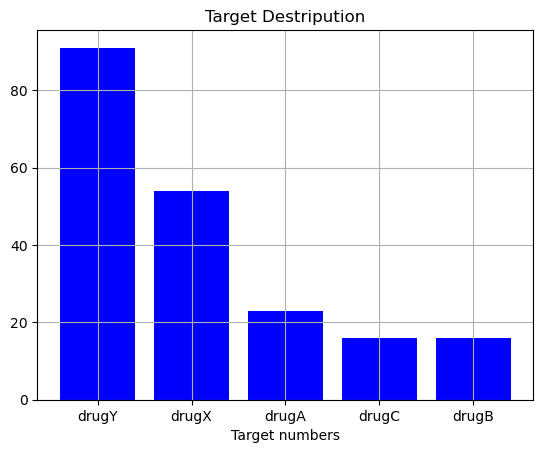

In [8]:
data = my_data['Drug'].value_counts()

plt.bar(data.index, data.values, color='b')
plt.xlabel('Target Names')
plt.xlabel('Target numbers')
plt.title('Target Destripution')
plt.grid()
plt.show()

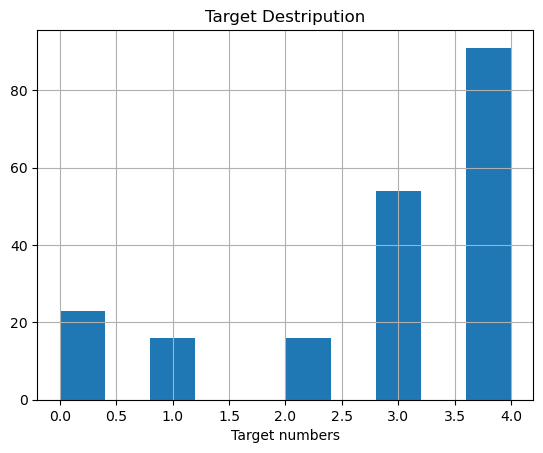

In [9]:
my_data['Drug_num'].hist()
plt.xlabel('Target Names')
plt.xlabel('Target numbers')
plt.title('Target Destripution')

plt.show()

In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
 6   Drug_num     200 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 11.1+ KB


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'BP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'Na_to_K'}>,
        <Axes: title={'center': 'Drug_num'}>]], dtype=object)

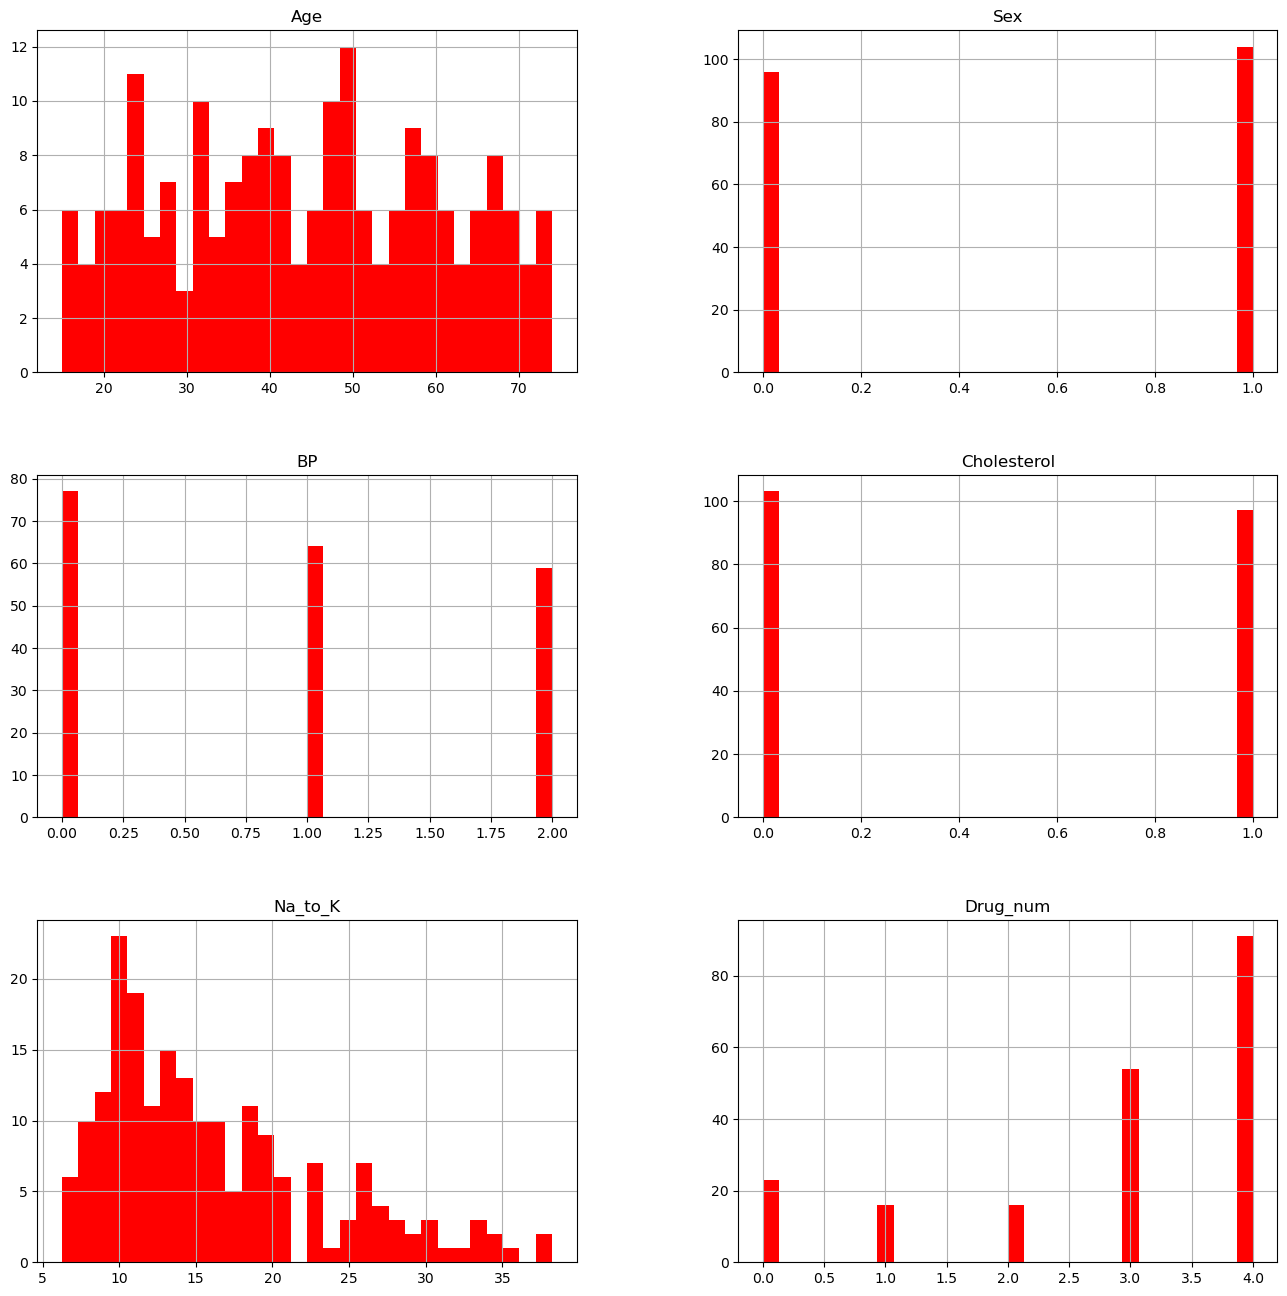

In [11]:
my_data.hist(bins= 30, color='r', figsize=(16,16))

You can now use the __corr()__ function to find the correlation of the input variables with the target variable.

#### Practice question
Write the code to find the correlation of the input variables with the target variable and identify the features most significantly affecting the target.


In [12]:
data = my_data.select_dtypes(include='number')

In [13]:
corr = data.corr()

In [14]:
corr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_num
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug_num,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


In [16]:
import seaborn as sns

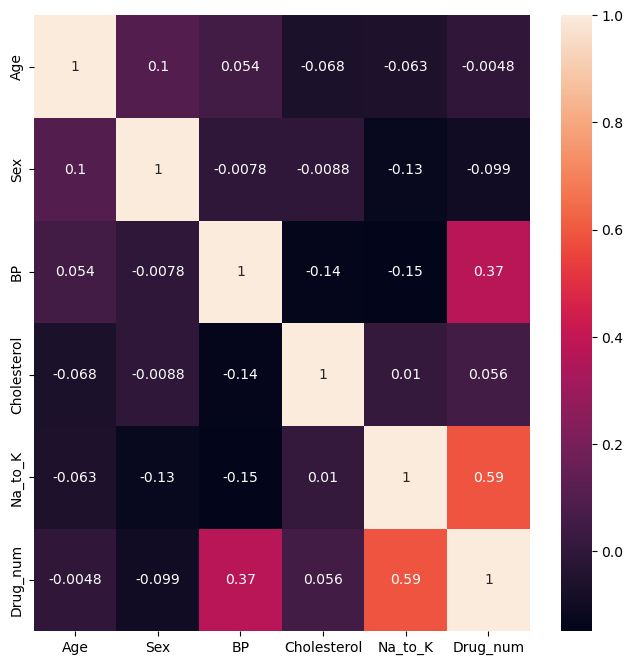

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
plt.show()

# your code here


<details><summary>Click here for the solution</summary>

```python
my_data.drop('Drug',axis=1).corr()['Drug_num']
```

This shows that the drug recommendation is mostly correlated with the `Na_to_K` and `BP` features. 

</details>


We can also understand the distribution of the dataset by plotting the count of the records with each drug recommendation. 


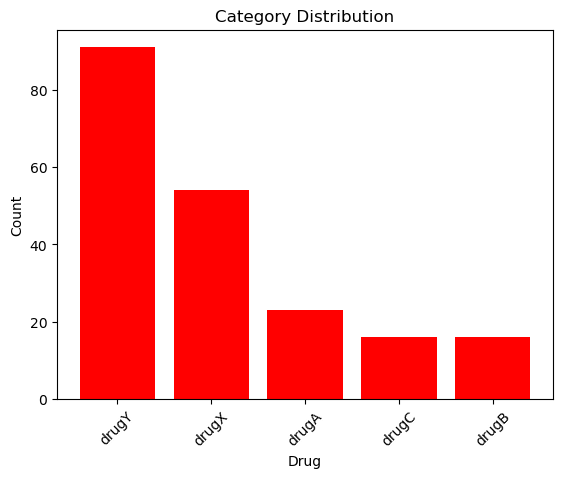

In [21]:
drugs = my_data['Drug'].value_counts()

plt.bar(drugs.index, drugs.values, color='r')


plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

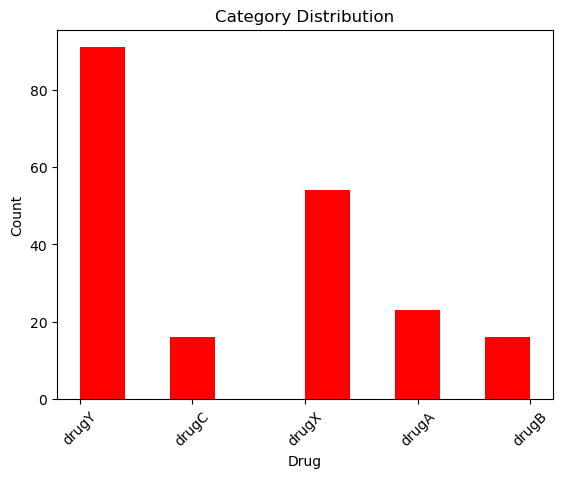

In [22]:
my_data['Drug'].hist(color='r')

plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.grid(None)
plt.show()

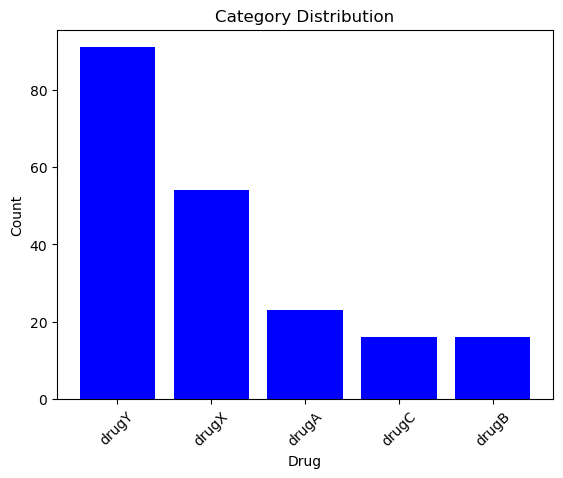

In [23]:
category_counts = my_data['Drug'].value_counts()

# Plot the count plot
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

This shows us the distribution of the different classes, clearly indicating that Drug X and Drug Y have many more records in comparison to the other 3.


## Modeling


For modeling this dataset with a Decision tree classifier, we first split the dataset into training and testing subsets. For this, we separate the target variable from the input variables.


In [24]:
y = my_data['Drug']
X = my_data.drop(['Drug','Drug_num'], axis=1)

Now, use the __train_test_split()__ function to separate the training data from the testing data. We can make use of 30% of the data for testing and the rest for training the Decision tree.


In [25]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)

You can now define the Decision tree classifier as __drugTree__ and train it with the training data. 


In [26]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_samples_split=10)

<details><summary>DecisionTreeClassifier parameters</summary>

**criterion**: It measure the quality of a split. Supported values are 'gini', 'entropy' and 'log_loss'. The default value is 'gini'.<br>
**splitter**: This parameter is used to choose the split at each node. Supported values are 'best' & 'random'. The default value is'best'<br>
**max_features**: It defines the number of features to consider when looking for the best split.<br>
**max_depth**: This parameter denotes maximum depth of the tree (default=None).<br>
**min_samples_split**: Defines the minimum number of samples required to split an internal node (default = 2).<br>
**min_samples_leaf**: The minimum number of samples required to be at a leaf node (default=1) <br>
**max_leaf_nodes**: It defines the maximum number of possible leaf nodes.<br>
**min_impurity_decrease**: It defines the threshold for early stopping tree growth. <br>
**class_weight**: It defines the weights associated with classes.<br>
**ccp_alpha**: It is a complexity parameter used for minimal cost-complexity pruning.<br>

</details>

In [27]:
drugTree.fit(X_trainset,y_trainset)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evaluation


Now that you have trained the decision tree, we can use it to generate the predictions on the test set.


In [28]:
tree_predictions = drugTree.predict(X_testset)

We can now check the accuracy of our model by using the accuracy metric.


In [29]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.9833333333333333


This means that the model was able to correctly identify the labels of 98.33%, i.e. 59 out of 60 test samples. 


### Visualize the tree

To understand the classification criteria derived by the Decision Tree, we may generate the tree plot.


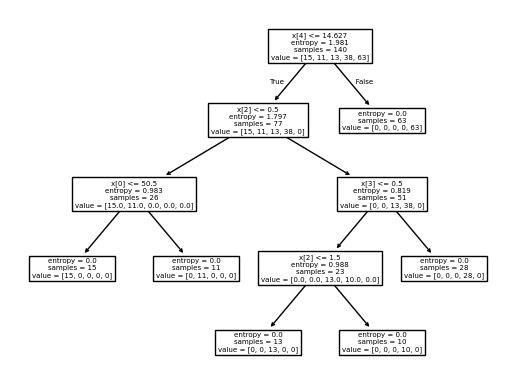

In [30]:
plot_tree(drugTree)
plt.show()

From this tree, we can derive the criteria developed by the model to identify the class of each training sample. We can interpret them by tracing the criteria defined by tracing down from the root to the tree's leaf nodes.

For instance, the decision criterion for Drug Y is ${Na\_to\_K} \gt 14.627$.

#### Practice Question:
Along similar lines, identify the decision criteria for all other classes.


<details><summary>Click here for the solution</summary>
Drug A : $Na\_to\_K <= 14.627, BP = High, Age <= 50.5$<br>
Drug B : $Na\_to\_K <= 14.627, BP = High, Age > 50.5$ <br>
Drug C : $Na\_to\_K <= 14.627, BP = Normal, Cholesterol = High$<br>
Drug X : $Na\_to\_K <= 14.627, (BP = Low, Cholesterol = High) or (BP = Normal/Low, Cholesterol = Normal)$
</details>


#### Practice Question:

If the max depth of the tree is reduced to 3, how would the performance of the model be affected?


In [31]:
# your code here
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_model.fit(X_trainset, y_trainset)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
pred = tree_model.predict(X_testset)
print(f"Accuracy = {np.round(100*metrics.accuracy_score(y_testset, pred), 2)}%")

Accuracy = 81.67%


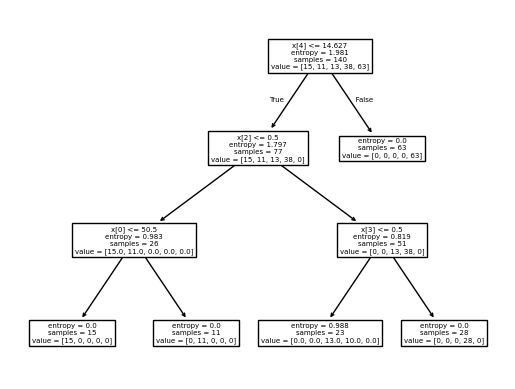

In [33]:
plot_tree(tree_model)
plt.show()

<details><summary>Click here for the solution</summary>

```python
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(X_trainset,y_trainset)
tree_predictions = drugTree.predict(X_testset)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))
```

</details>


### Congratulations! You're ready to move on to your next lesson.
 

<a href="https://www.linkedin.com/in/ezzaldeen-esmail-3836b0258/" target="_blank">Ezzaldeen Esmail</a>  

